In [18]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import preprocessing

In [42]:
iris=pd.read_csv('iris.csv', index_col=0)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
iris['Species']= label_encoder.fit_transform(iris['Species']) 

In [44]:
x=iris.iloc[:,0:4]
y=iris['Species']

In [45]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [46]:
y

Id
1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Species, Length: 150, dtype: int32

In [47]:
iris['Species'].unique()

array([0, 1, 2])

In [48]:
iris.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [49]:
colnames = list(iris.columns)
colnames

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

In [50]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [51]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

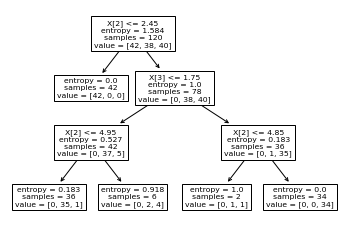

In [52]:
#PLot the decision tree
tree.plot_tree(model);

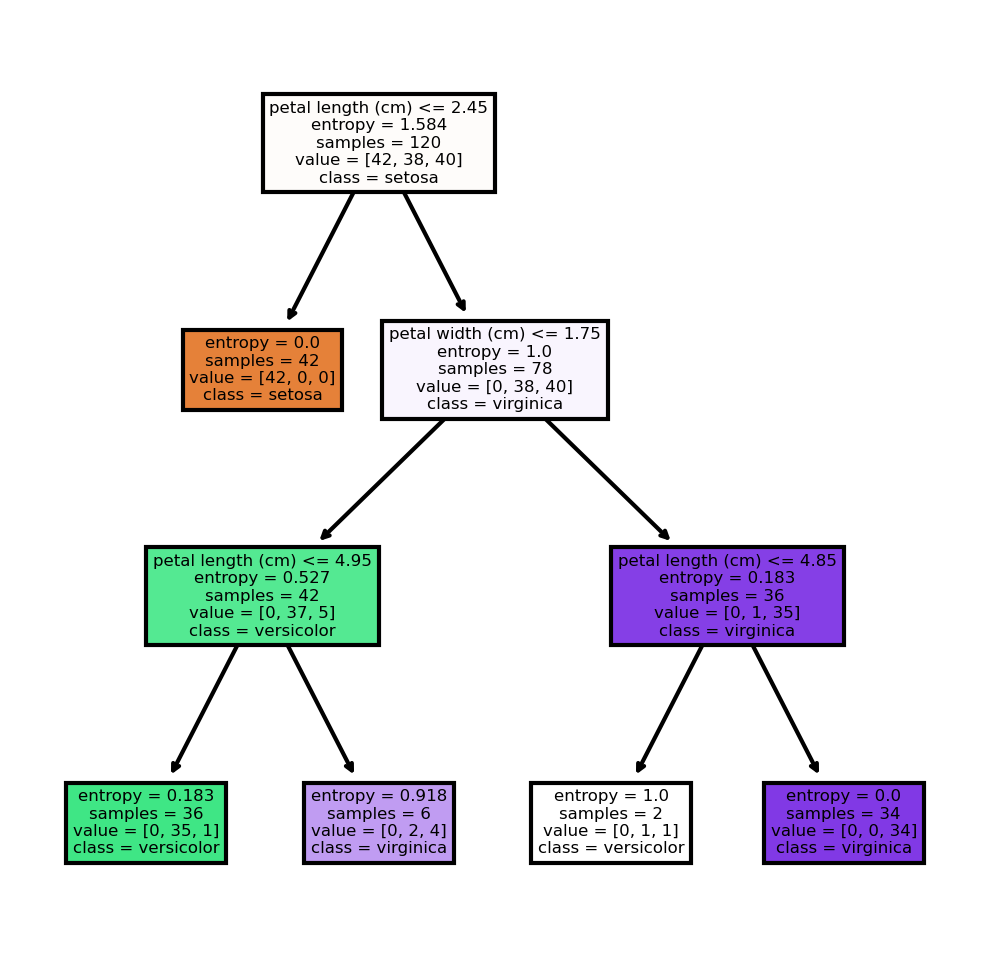

In [53]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [54]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    13
2     9
0     8
dtype: int64

In [55]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [56]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
Species,,,
0,8,0,0
1,0,12,0
2,0,1,9


In [57]:
# Accuracy 
np.mean(preds==y_test)

0.9666666666666667

In [58]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [59]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [60]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.9666666666666667

[Text(125.55000000000001, 190.26, 'X[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [42, 38, 40]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.75\ngini = 0.5\nsamples = 78\nvalue = [0, 38, 40]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 4.95\ngini = 0.21\nsamples = 42\nvalue = [0, 37, 5]'),
 Text(41.85, 27.180000000000007, 'gini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 4.85\ngini = 0.054\nsamples = 36\nvalue = [0, 1, 35]'),
 Text(209.25, 27.180000000000007, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]')]

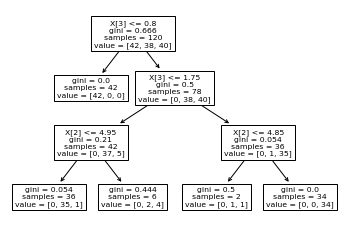

In [63]:
tree.plot_tree(model_gini)

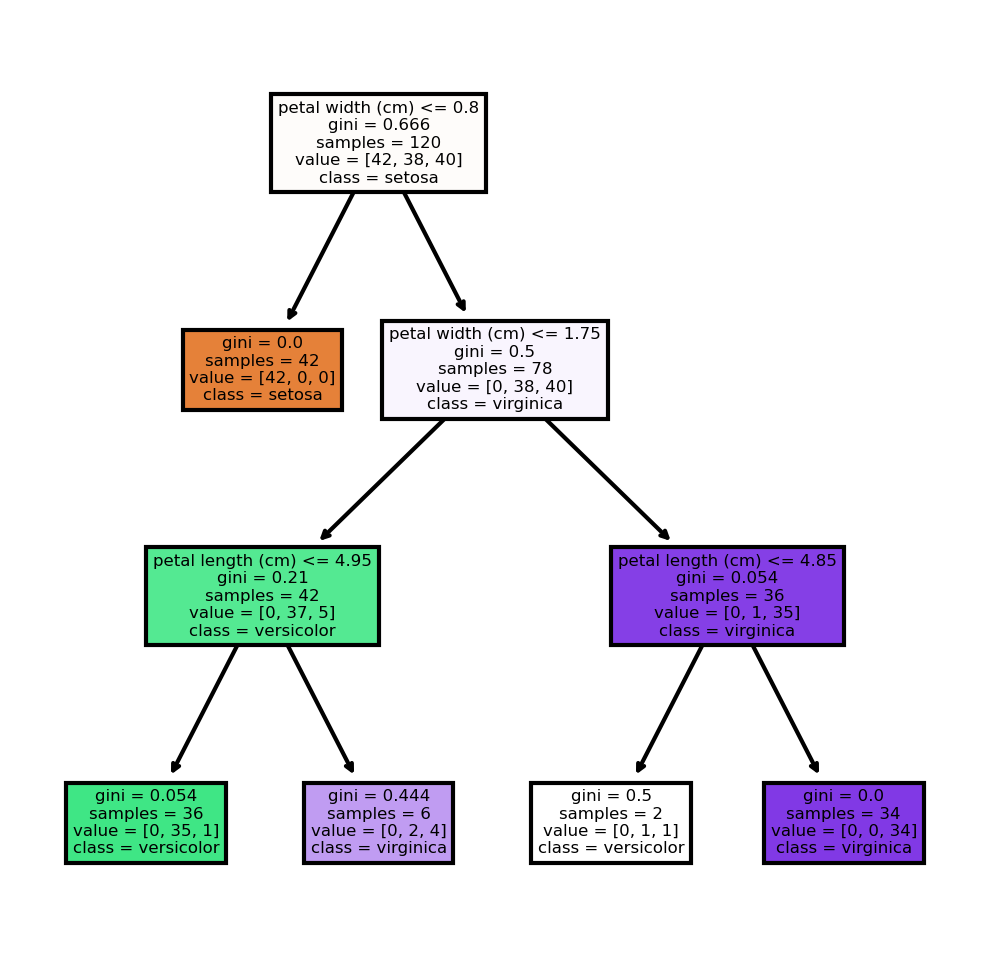

In [65]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);